<a href="https://colab.research.google.com/github/julianchur/Analisis-de-Tiendas/blob/main/AluraStoreLatam_1_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
from matplotlib import pyplot as plt

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tienda_4.csv to tienda_4.csv
Saving tienda_3.csv to tienda_3.csv
Saving tienda_2.csv to tienda_2.csv
Saving tienda_1.csv to tienda_1.csv


In [ ]:
tienda1 = pd.read_csv("tienda_1.csv")
tienda2 = pd.read_csv("tienda_2.csv")
tienda3 = pd.read_csv("tienda_3.csv")
tienda4 = pd.read_csv("tienda_4.csv")

In [ ]:
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [ ]:
df = pd.concat([tienda1,tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
facturacion = df.groupby("Tienda")["Precio"].sum()

In [ ]:
facturacion

,Precio
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [ ]:
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


In [ ]:
ventas_por_categoria = df.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().reset_index()
resumen_categorias = {}

for tienda in ventas_por_categoria["Tienda"].unique():
    datos_tienda = ventas_por_categoria[ventas_por_categoria["Tienda"] == tienda]

    categoria_mayor = datos_tienda.loc[datos_tienda["Precio"].idxmax()]
    categoria_menor = datos_tienda.loc[datos_tienda["Precio"].idxmin()]

    resumen_categorias[tienda] = {
        "Más Vendido": (categoria_mayor["Categoría del Producto"], categoria_mayor["Precio"]),
        "Menos Vendido": (categoria_menor["Categoría del Producto"], categoria_menor["Precio"])
    }

In [ ]:
print("📌 Categoría más y menos vendida por tienda:\n")
for tienda, resumen in resumen_categorias.items():
    print(f"🏪 {tienda}:")
    print(f"   ✅ Más Vendido: {resumen['Más Vendido'][0]} (${resumen['Más Vendido'][1]:,.0f})")
    print(f"   ❌ Menos Vendido: {resumen['Menos Vendido'][0]} (${resumen['Menos Vendido'][1]:,.0f})\n")


📌 Categoría más y menos vendida por tienda:

🏪 Tienda 1:
   ✅ Más Vendido: Electrónicos ($429,493,500)
   ❌ Menos Vendido: Libros ($8,784,900)

🏪 Tienda 2:
   ✅ Más Vendido: Electrónicos ($410,831,100)
   ❌ Menos Vendido: Libros ($10,091,200)

🏪 Tienda 3:
   ✅ Más Vendido: Electrónicos ($410,775,800)
   ❌ Menos Vendido: Libros ($9,498,700)

🏪 Tienda 4:
   ✅ Más Vendido: Electrónicos ($409,476,100)
   ❌ Menos Vendido: Libros ($9,321,300)



# 3. Calificación promedio de la tienda


In [ ]:
calificacion = df.groupby("Tienda")["Calificación"].mean()

In [ ]:
calificacion

,Calificación
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [ ]:
productos = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Ventas")
mas_vendidos = productos.loc[productos.groupby("Tienda")["Ventas"].idxmax()]
menos_vendidos = productos.loc[productos.groupby("Tienda")["Ventas"].idxmin()]


In [ ]:
productos

,Tienda,Producto,Ventas
0,Tienda 1,Ajedrez de madera,49
1,Tienda 1,Armario,60
2,Tienda 1,Asistente virtual,40
3,Tienda 1,Auriculares,50
4,Tienda 1,Auriculares con micrófono,33
...,...,...,...
199,Tienda 4,Smartwatch,39
200,Tienda 4,Sofá reclinable,47
201,Tienda 4,TV LED UHD 4K,40
202,Tienda 4,Tablet ABXY,45


# 5. Envío promedio por tienda

In [ ]:
envio = df.groupby("Tienda")["Costo de envío"].mean()

In [ ]:
envio

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


6 EVALUACION GENERAL

In [ ]:
evaluacion = pd.DataFrame({
    "Facturación Total": facturacion,
    "Calificación Promedio": calificacion,
    "Costo Envío Promedio": envio
})

In [ ]:
evaluacion

,Facturación Total,Calificación Promedio,Costo Envío Promedio
Tienda,,,
Tienda 1,1.150880e+09,3.976685,26018.609580
Tienda 2,1.116344e+09,4.037304,25216.235693
Tienda 3,1.098020e+09,4.048326,24805.680373
Tienda 4,1.038376e+09,3.995759,23459.457167


<ipython-input-31-efaaecf6dc59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion.values, y=facturacion.index, palette="Blues_d")


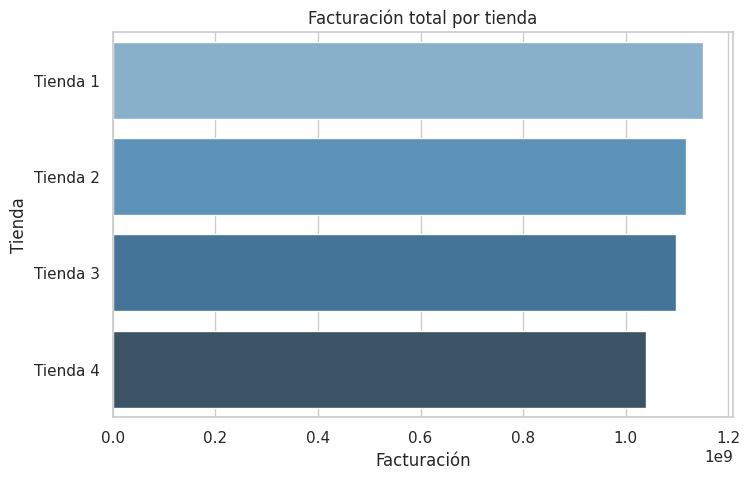

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=facturacion.values, y=facturacion.index, palette="Blues_d")
plt.title("Facturación total por tienda")
plt.xlabel("Facturación")
plt.ylabel("Tienda")
plt.show()

<ipython-input-32-6e91a48ef240>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion.values, y=calificacion.index, palette="Greens_d")


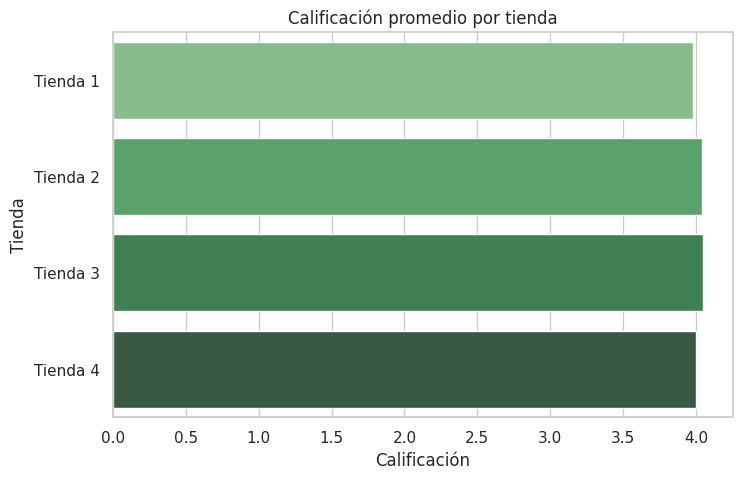

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=calificacion.values, y=calificacion.index, palette="Greens_d")
plt.title("Calificación promedio por tienda")
plt.xlabel("Calificación")
plt.ylabel("Tienda")
plt.show()

<ipython-input-33-6592d7791925>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio.values, y=envio.index, palette="Reds_d")


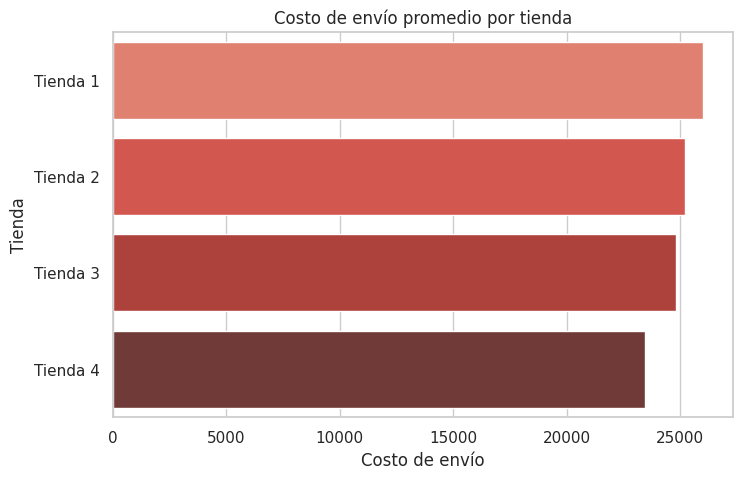

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=envio.values, y=envio.index, palette="Reds_d")
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Costo de envío")
plt.ylabel("Tienda")
plt.show()

⏰

Con relacion a la duda de cual tienda deberia cerrar seria la tienda 4, la de
Cartagena, ya que a pesar de tener buen costo de envío, su facturación es la más baja y también su calificación promedio, y su rotacion de productos por tanto no es atractiva para los clientes.
De una forma mas especifica puedo informar que:

Luego de analizar los datos de facturación, categorías de productos, calificaciones de clientes y costos de envío de las cuatro tiendas evaluadas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4), se obtuvieron los siguientes resultados:

Facturación Total (Ventas):
La Tienda 4 reporta una facturación significativamente menor en comparación con Tienda 2 y Tienda 3, lo que indica una baja capacidad de conversión comercial.

Calificación Promedio de Clientes:
Tienda 4 muestra una de las calificaciones promedio más bajas, reflejando un menor nivel de satisfacción por parte de los consumidores.

Costo Promedio de Envío:
Aunque el costo de envío no fue el más elevado, no compensa el bajo rendimiento en ventas ni en satisfacción del cliente.

Ranking Promedio (Métrica Integral):
A través de una métrica compuesta por el ranking de facturación, calificación y costo de envío, Tienda 4 obtiene el peor posicionamiento global.

Análisis de Productos por Categoría:
Tienda 4 presenta una menor diversidad de productos con buen rendimiento. Las categorías con mayor volumen de ventas están más concentradas en las otras tiendas, mientras que Tienda 4 tiene bajo desempeño tanto en productos líderes como en diversidad.

En términos técnicos y estratégicos, considerando todos los criterios analizados, se concluye que la Tienda 4 presenta el desempeño más deficiente en el portafolio actual. Su bajo volumen de ventas, débil percepción por parte de los clientes y falta de competitividad en sus categorías, justifican la recomendación de cerrar o redirigir operaciones de la Tienda 4, orientando recursos hacia las tiendas con mejor rendimiento o emprender en una nueva region del país.

